<img src='https://github.com/JacCars/Classification/blob/master/Explore_header.jpeg?raw=true'>

# Team 5 'Climate Change Belief Analysis' classification challenge

<a id="1"></a>
***
## **Introduction**
***

<a id="2"></a>
**Purpose of this notebook**<br>
This notebook contains the code (and walk-through explanations) used by Team 5 of the July 2020 cohort of the Explore Data Science Academy (EDSA) in Johannesburg, South Africa, for our Machine Learning Classification sprint (module).

<a id="3"></a>
**Context**<br>
For this sprint we were challenged to compete in a private Kaggle competition, hosted by EDSA, titled 'Climate Change Belief Analysis'. This competition involved using Natural Language Processing (NLP) and Classification algorithms to analytically deconstruct real tweets about Climate Change with the goal of predicting whether the tweets are anti climate change, pro climate change, neutral, or news. This type of predictive modelling is also called Sentiment Analysis or Sentiment Prediction.

<a id="section-4"></a>
### **Table of Contents**
- [Introduction](#1)
  * [Purpose of this notebook](#2)
  * [Context](#3)
  * [Table of Contents](#4)
  * [Problem Statement](#5)
  * [Comet instructions](#6)
- [Imports](#7)
  * [Python imports](#8)
  * [Importing the datasets](#9)
- [Exploretory Data Analysis (EDA)](#10)
  * [Properties of the dataset](#11)
  * [Shape](#12)
  * [Data types and missing values](#13)
  * [Blank value check](#14)
  * [Duplicates](#15)
  * [Word counts](#16)
  * [Buzzwords for each sentiment category](#17)
  * [Class distribution](#18)
- [Data Pre-processing](#19)
  * [Hashtag and Mention extraction](#20)
  * [Named entitiy recognition (NER) with Spacy](#21)
  * [Lemmatization and Parts of Speecs (POS) tagging](#22)
  * [Class balancing](#23)
  * [Emoji extraction](#24)
- [Predictive modelling](#25)
  * [Base models](#26)
  * [Naive Bayes (multinomial)](#27)
  * [Logistic Regression Classifier](#28)
  * [Linear Support Vector Classifier (SVC)](#29)
  * [Support Vector Classifier (SVC)](#30)
  * [Decision Tree Classifier](#31)
  * [Random Forest Classifier](#32)
  * [Adaboost Classifier](#33)
  * [eXtreme Gradient Boosting Classifier (XGBoost)](#34)
  * [SMOTE class balancing](#35)
  * [Model Selection and optimisation](#36)
- [Preparing submission](#37)
- [Comet logs for each model](#38)
- [Conclusion](#39)
- [Contributions and acknowledgements](#40)

<a id="5"></a>
***
### **Problem Statement**
Build a classifiaction model with a pertinent data pre-processing pipeline and version controlling that is capable of providing accurate sentiment predictions (pro:1, neutral:0, anti:-1, news:2) based on tweets about climate change with the aim of predicting the sentiment of said tweet(s).

<a id="6"></a>
***
### **Comet Instructions**
<br>

- For effective experimentation and version controll we used Comet. Comet, built specifically for Machine Learning, allows us to track changes to our models as we develop, train, and test them. It provides a convenient graphical interface to moniter model performance while tweaking the model, along with the ability to reproduce any logged experiment. Below is a guide on how to use Comet.

<br>

step 1: Pip Instal The comet_ml.

step 2 : Run the cell below the pip install code cell.

step 3: Import all the libraries.

step 4: run every code cell up untill the first model which is Navies, meaning do not train and test any model apart from navies.

sep 5: Quickly jump to the Comet Log Expiriement Section of the notebook then run the code cell that has naives bays comet params.

step 6: go to the code cell commented Log expiriment then run that coe cell, PS: the argument in that code cell will have to be updated for each model. Also note that i have commented out the the metric only because weh you run each module the metric dictionary have been defined.

step 7 : Close the expiriment.

repeat step 1-7 for each model, please do not run multiple models at the same time, run one model at the time, and once you done with the model you can comment out the model aswell as the params cell block for that model. 

please let me know as soon as the first model is done, so i can check if comet saved the params and the metrics.

let me know if you encounter any errors. Thank You!!!

In [ ]:
#installing comet_ml 
#!pip install comet_ml #always run this code cell everytime you want to initiate a comet exprience 

In [ ]:
# Import comet_ml
from comet_ml import Experiment

# Create an experiment with your api key:
experiment = Experiment(
    api_key="ndn09QRwceZNaT2EN1oHmRHeE",
    project_name="team-5-base-models",
    workspace="kgauhelo-mokgawa",
)

'\n import comet_ml at the top of your file\nfrom comet_ml import Experiment\n\n Create an experiment with your api key:\nexperiment = Experiment(\n    api_key="ndn09QRwceZNaT2EN1oHmRHeE",\n    project_name="team-5-base-models",\n    workspace="kgauhelo-mokgawa",\n)\n'

<a id="7"></a>
***
## **Imports**
***

<a id="8"></a>
### **Python imports**
Importing the python packages/libraries that we'll use.

In [223]:
# Pandas and numpy for basic data manipulation
import pandas as pd
import numpy as np

# String and re (regular expression) for string/regex manipulations
import string
import re

# Counter for EDA (emojis)
from collections import Counter


# SciKit-Learn (sklearn) classes for model building, text vectorisation, and metrics for performance analysis
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import TruncatedSVD #for XGBoost only: feature dimensionality reduction
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score, log_loss, make_scorer,confusion_matrix
from sklearn.pipeline import Pipeline

# eXtreme Gradient Boosting (XGBoost package): BlackBox gradient boosting package
from xgboost import XGBClassifier

# Packages for class balancing
from sklearn.utils import resample
from imblearn.over_sampling import BorderlineSMOTE, KMeansSMOTE
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
import smote_variants as sv


# advertools for emoji functionality
import advertools


#NLTK (Natural Language Tool Kit) and Spacy for NLP (Natural Language Processing)
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import nltk
import spacy
from spacy_langdetect import LanguageDetector #detects which language is used
import en_core_web_sm #Spacy English language dictionary

# NLTK dictionary Downloads
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Plotting/visualisation packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /home/jcar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jcar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jcar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jcar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<a id="9"></a>
### **Importing the datasets**
- The 'train' DataFrame below contains all of the training data (about 15k rows) for the kaggle competition while the 'test' DataFrame (about 10k rows) contains the data on which we have to predict climate change sentiment. For ease of access both 'train' and 'test' sets are hosted on our public GitHub repository.

In [161]:
train = pd.read_csv('https://raw.githubusercontent.com/JacCars/Classification/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/JacCars/Classification/master/test.csv')

<a id="10"></a>
***
## **Exploratory Data Analysis (EDA)**
***
In this section we will thoroughly explore the datasets and their properties, keeping an eye out for context-specific opportunities and caveats.

<a id="11"></a>
### **Properties of the dataset**


<a id="12"></a>
### **Shape**

Let's first look at the shape (number of entries/rows and columns) of the datasets to get a better idea of how much training and testing data we have.

In [162]:
print(f'The train dataset has {train.shape[0]} rows/entries and {train.shape[1]} columns ({train.columns[0]}, {train.columns[1]}, and {train.columns[2]})')
print(f'The test dataset has {test.shape[0]} rows/entries and {test.shape[1]} columns ({test.columns[0]} and {test.columns[1]})')

The train dataset has 15819 rows/entries and 3 columns (sentiment, message, and tweetid)
The test dataset has 10546 rows/entries and 2 columns (message and tweetid)


<a id="13"></a>
### **Data types and missing values**
<br>

From executing the .info() method on both train and test sets we can see that:
  - There are no missing values in either set
  - 'sentiment' (in the train set) is of data type 'int64' (should be 'category' since we are classifying and not predicting a numerical value) though we don't have to manually change the datatype as the classification algorithm does this for us.
  - 'message' is of data type object in both sets (correct)
  - 'tweetid' is of data type 'int64' in both sets (correct)

In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


<a id="14"></a>
### **Blank value check**
<br>

Even though there are no Nan values it's still possible to have empty strings (blank values) so let's check for those with pandas' isspace() method.

In [165]:
# Ensure that there are no blank tweets (tweets that don't show as NaN/missing but contain no text)
print(f"There are {train[train['message'].map(lambda x: x.isspace())].count().sum()} blank values in the 'message' column of the train set")
print(f"There are {test[test['message'].map(lambda x: x.isspace())].count().sum()} blank values in the 'message' column of the test set")

There are 0 blank values in the 'message' column of the train set
There are 0 blank values in the 'message' column of the test set


<a id="15"></a>
### **Duplicates**
<br>

As alwasy, let's check for duplicates. This is a good example of how much context matters: In twitter context duplicates mostly refer to retweets (indicated by RT at the beginning of the tweet). Removing duplicates from a majority class (the sentiment class with the most entries) is a convenient way of downsampling a majority class without losing any information (more on this later).

In [166]:
print(f"{train[train.duplicated(subset='message')]['message'].count()} values, or ~{round(train[train.duplicated(subset='message')]['message'].count()/len(train)*100, 2)}%  of the train set are duplicated (i.e. retweets)")
print(f"{test[test.duplicated(subset='message')]['message'].count()} values, or ~{round(test[test.duplicated(subset='message')]['message'].count()/len(test)*100, 2)}%  of the test set are duplicated (i.e. retweets)")

1590 values, or ~10.05%  of the train set are duplicated (i.e. retweets)
971 values, or ~9.21%  of the test set are duplicated (i.e. retweets)


<a id="16"></a>
### **Word counts**
<br>

It's pertinent to analyse the class distribution of wordcounts (i.e. do specific classes tend to have shorer/longer wordcounts). The below boxplot shows that there isn't a significant difference between wordcounts between classes so adding a 'wordcount' feature will only create further noise to mislead the classification algorithms. Note that twitter limits tweet to 250 characters so even if there is a true underlying association between class and average word count it won't really show in this context.

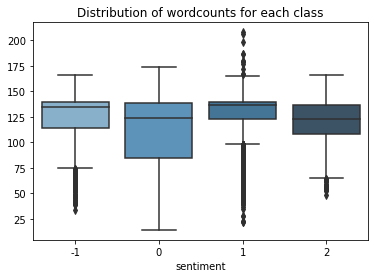

In [167]:
length = [len(text) for text in list(train['message'].astype('str'))]
# Plot the distribution of the length tweets for each class using a box plot
sns.boxplot(x=train['sentiment'], y=length, data=train, palette=("Blues_d"))
plt.title('Distribution of wordcounts for each class')
plt.show()

<a id="17"></a>
### **Buzzwords for each sentiment category**
<br>

Wordclouds are great tools to visualise specific word prominence per class and hence to expose buzzwords (popular terms that are reused by people who talk about that topic
<br>

**Note:** Because we're creating this visualisatin before the pre-processing is applied some of noise (like 'https' will still show)  

In [168]:
pro_words = ' '.join([text for text in train['message'][train['sentiment']==1]])
pro_wordcloud = WordCloud(width=400, 
                          height=250, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(pro_words)

neutral_words = ' '.join([text for text in train['message'][train['sentiment']==0]])
neutral_wordcloud = WordCloud(random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Purples").generate(neutral_words)

anti_words = ' '.join([text for text in train['message'][train['sentiment']==0]])
anti_wordcloud = WordCloud(random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Reds").generate(anti_words)

news_words = ' '.join([text for text in train['message'][train['sentiment']==0]])
news_wordcloud = WordCloud(random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(news_words)

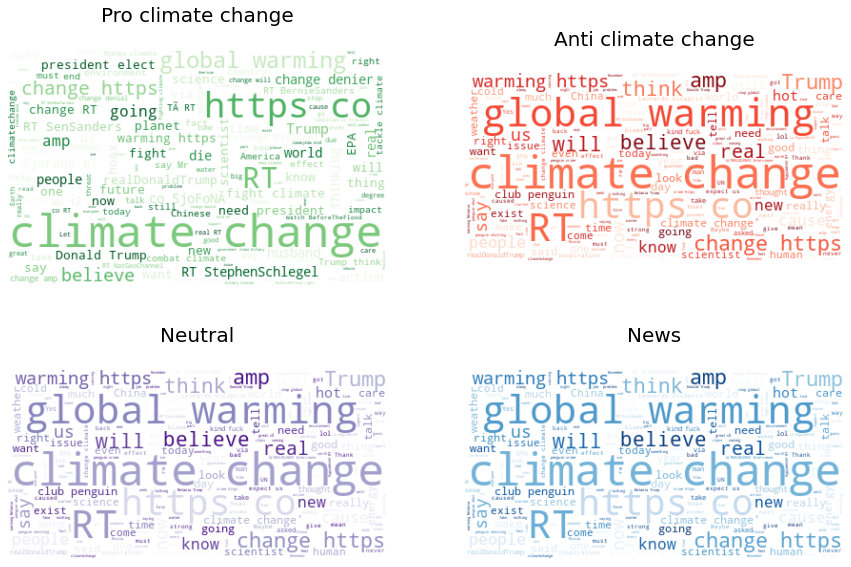

In [169]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].imshow(pro_wordcloud, interpolation="bilinear")
ax[0,1].imshow(anti_wordcloud, interpolation="bilinear")
ax[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
ax[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for axs in fig.axes:
    plt.sca(axs)
    plt.axis('off')

ax[0,0].set_title('Pro climate change\n', fontsize=20)
ax[0,1].set_title('Anti climate change\n', fontsize=20)
ax[1,0].set_title('Neutral\n', fontsize=20)
ax[1,1].set_title('News\n', fontsize=20)
#plt.tight_layout()
plt.show()

<a id="18"></a>
### **Class distribution**
<br>

The below histogram (left) and pie-chart (right) show the class distribution of the 'train' set:
<br>
 1 (pro):    8530
 <br>
 2 (news):    3640
 <br>
 0 (neutral):    2353
 <br>
-1 (anti):    1296
<br>

From this it's clear that pro is a greater majority class and that class balancing might be necessary to improve prediction accurary in the minority classes.  

/home/jcar/anaconda3/envs/anaconda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


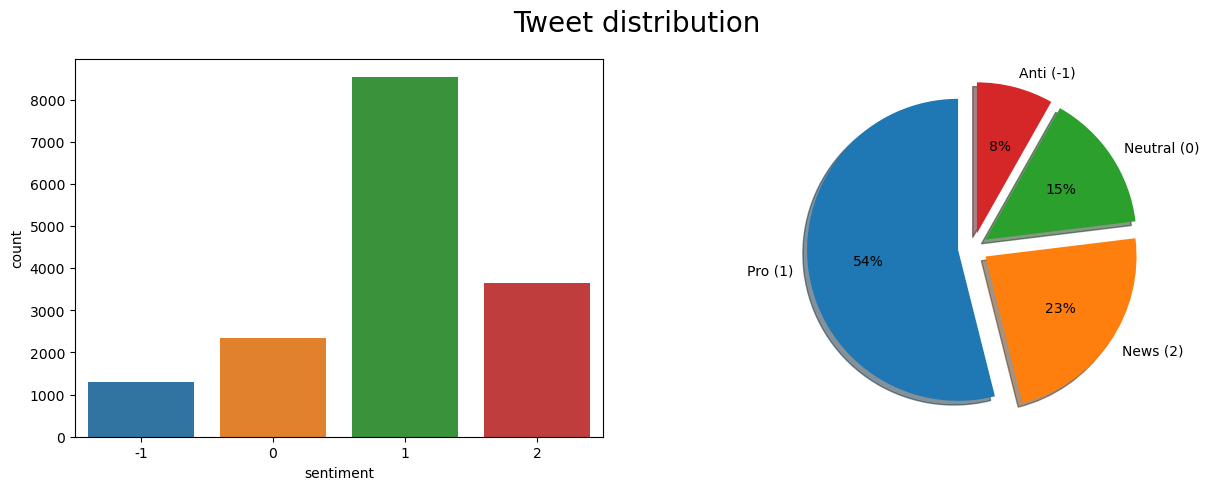

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64


In [170]:
# Display target distribution
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(15, 5), 
                         dpi=100)

sns.countplot(train['sentiment'], ax=axes[0])

labels=['Pro (1)', 'News (2)', 'Neutral (0)', 'Anti (-1)'] 

axes[1].pie(train['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Tweet distribution', fontsize=20)
plt.show()
print(train['sentiment'].value_counts())

<a id="19"></a>
***
## **Data Pre-processing**
***
In this section we will be implementing some 'data wrangling' (also known as pre-processing or 'data munging' to extract features, clean the data, and balance the sentiment classes.
<br>

- You'll note that the majority of features produced by the below techniques are not actually used in the modelling section further down. A more in depth explanation of feature selection will be given in the 'Predictive modelling' section futher below, discussing why these features were not used. For now, focus on the insights into the data that these extracted features provide.
- Going forward, when we refer to accuracy, unless stated otherwise, we refer to the weighted f1 score derived from submitting predictions to kaggle since this is the evaluation metric for the competition/challenge.

<a id="20"></a>
### **Hashtag and Mention extraction**
<br>

Hashtags (starting with #) and mentions (starting with @, denotes named enitites usually with registered twitter accounts) can provice valuable associative data as certain hashtags as associated with pro/anti class sentiments (like #ImVotingBecause for the pro class and #Snowflakes for the anti class). Similarly, certain people and organisation are associated with certain centiments, like @realDonaldTrump for anti and @EPA with pro. We thus create two additional columns for hashtags and mentions (if present).

In [171]:
# train datset extraction
#extract hashtags
train['hashtags'] = train['message'].str.findall(r'#.*?(?=\s|$)')
train['hashtags'] = train['hashtags'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])

#extract mentions
train['mention']=train['message'].str.findall(r'(?:(?<=\s)|(?<=^))@.*?(?=\s|$)')
train['mention'] = train['mention'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])

# test datset extraction
#extract hashtags
test['hashtags'] = test['message'].str.findall(r'#.*?(?=\s|$)')
test['hashtags'] = test['hashtags'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])

#extract mentions
test['mention']=test['message'].str.findall(r'(?:(?<=\s)|(?<=^))@.*?(?=\s|$)')
test['mention'] = test['mention'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])

<a id="21"></a>
### **Named Entity Recognition (NER) with Spacy**
<br>

Named entity Recognition (similar to @'s but much broader) captures information about people, organisation, governments, and about any other named enitities like like public parks, named forests (areas) etc. Below, we create an additional column in both train and test sets containing all the named entities that the Spacy library was able to identify. Here we use the Spacy library as opposed to NLTK due to Spacy's more advanced and computationally efficient NER functionality.

In [172]:
# Load spacy english dictionary (small version) #use 'en_core_web_lg' for more comprehensive results.
nlp = spacy.load('en_core_web_sm') #can also use 'en_core_web_lg' for a larger dictionary though it takes longer to load and run.
# Add a language detector to the spacy pipeline.
nlp.add_pipe(LanguageDetector(), name='language_detector') #This is for language detection

def extract_NERs (col):
  new_col = []
  new_col_lang = []
  for text in col.to_list():
      tweet_ents = []
      tweet = nlp(text)
      new_col_lang.append(tweet._.language['language'])
      for ent in tweet.ents:    
          tweet_ents.append(ent.text)
      new_col.append(tweet_ents)
  return new_col, new_col_lang

# NER and language for the train set
train['Named_entities'], train['language'] = extract_NERs(train['message'])


# NER and language for the test set
test['Named_entities'], test['language'] = extract_NERs(test['message'])

# Read in dataframe with language mapping codes (2-letter)
lang_codes = pd.read_csv('https://raw.githubusercontent.com/JacCars/Classification/master/language-codes_csv.csv', index_col='alpha2').to_dict()['English']

# Map 2-letter language keys to full language name (in English): train set
train['language'] = train['language'].map(lambda x: lang_codes[x])

# Map 2-letter language keys to full language name (in English): test set
test['language'] = test['language'].map(lambda x: lang_codes[x])

<a id="22"></a>
### **Lemmatization and Parts of Speecs (POS) tagging**
<br>

Lemmatization reduces branched words to their base forms, e.g. 'running', 'runner', 'ran', and 'rerun' are all reduced to 'run'. This significantly decreases the size of the text vocabulary (the model trains faster) and reduces the ammount of overall noise in the dataset. Below we define and use the function 'lemmatize' to lemmatize each tweet in the 'message' column. The nested function wordnet_pos maps the parts of speech to the internal NLTK hash keys (identifiers) to make the POS's more human readable and reduce their dimensionality (e.g. all verb types are reclassed as VERB, all noun types as NOUN, etc.)

In [173]:
def lemmatize(df):

  # First the tweets are tokenized and tokens stored in a new column 'message_tokens'.
  df['message_tokens'] = df['message'].apply(word_tokenize)
  # Then we extract the POS tags from the tokenized tweets ans store them in a new column 'POS_tags'.
  df['POS_tags'] = df['message_tokens'].apply(nltk.pos_tag)

  def wordnet_pos(tag):
    if tag.startswith('J'):
      return wordnet.ADJ

    elif tag.startswith('V'):
      return wordnet.VERB

    elif tag.startswith('N'):
      return wordnet.NOUN

    elif tag.startswith('R'):
      return wordnet.ADV
      
    else:
      return wordnet.NOUN


  tizer = WordNetLemmatizer()
  df['POS_tags'] = df['POS_tags'].apply(lambda x: [(word, wordnet_pos(pos_tag)) for (word, pos_tag) in x])
  df['lemmas'] = df['POS_tags'].apply(lambda x: [tizer.lemmatize(word, tag) for word, tag in x])
  df['lemmas'] = [' '.join(map(str, l)) for l in df['lemmas']] 

  return df

train = lemmatize(train)
test = lemmatize(test)

<a id="23"></a>
### **Class balancing**
**Approach:**
- Note: balancing is only performed on the train set as it will be used to train the model. Once trained on class-balanced data, the trained model is expected to more accurately predict minority class sentiments.


- **First** 
  - We split the train dataframe into 4 dataframes containing each class seperately.
  - We downsample the majority class (pro_class) by first removing retweets (duplicates) from the majority class (also helps reduce noise and overfitting). Removing retweets reduced the pro_class size by ~ 15.3% from 8530 to 7224 (still more than 5 times larger than the smallest minority class). If further downsampling is required, we can remove a random subset of samples from the class.

- **Secondly** 
  - We upsample the minority classes (-1:anti, 0:neutral, and 2:news) taking care to only upsample unique tweets and not retweets (this will help reduce noise/duplicates in the minority classes and reduce overfitting)
<br>

**Note:** You'll see below only the final resampling proportions we chose to go with. We iteratively tried various combinations, adjusting the proportions based on increases and decreases in score upon kaggle submission.
<br>
Briefly: 
- Retweets were not removed from the majority class (code is commented out). 
- The anti and neutral, and News classes were upsampled by 19%, 2%, and 1.8%,  respectively.


In [174]:

# Split train set into 4 dataframes each with its unique sentiment
anti_class = train[train['sentiment']==-1]
neutral_class = train[train['sentiment']==0]
pro_class = train[train['sentiment']==1]
news_class = train[train['sentiment']==2]


# Remove retweets (duplicates) from the pro_class (downsample):
#before_dup = pro_class[pro_class['sentiment']==1]['sentiment'].count()
#pro_class = pro_class.drop(pro_class[pro_class.duplicated(subset='message', keep='first')].index)
#after_dup = pro_class[pro_class['sentiment']==1]['sentiment'].count()

#print(f'There was a {round(100 - after_dup/before_dup*100, 2)}% reduction in pro_class size after duplicate removal. \nOriginal size: {before_dup}\nCurrent pro_class size: {after_dup}')

# Upsample minority class by 1%: Anti
anti_class_uniqs = anti_class.drop(anti_class[anti_class.duplicated(subset='message', keep='first')].index)
anti_upsample = resample(anti_class_uniqs, replace=False, n_samples=(int(19/100*anti_class_uniqs.shape[0])))
anti_class = pd.concat([anti_class, anti_upsample])


# Upsample minority class by 2%: Neutral
neutral_class_uniqs = neutral_class.drop(neutral_class[neutral_class.duplicated(subset='message', keep='first')].index)
neutral_upsample = resample(neutral_class_uniqs, replace=False, n_samples=(int(2/100*neutral_class_uniqs.shape[0])))
neutral_class = pd.concat([neutral_class, neutral_upsample])

# Upsample minority class by 1.8%: News
news_class_uniqs = news_class.drop(news_class[news_class.duplicated(subset='message', keep='first')].index)
news_upsample = resample(news_class_uniqs, replace=False, n_samples=(int(1.8/100*news_class_uniqs.shape[0])))
news_class = pd.concat([news_class, news_upsample])

# Concatenate individual class dataframes into one 'train' dataframe.
train = pd.concat([pro_class, anti_class, neutral_class, news_class])


**Let's visualise the effect of our class balancing on the overall class distribution.**

<br>

- As you can see from the graphs below, very little balancing was actually done. Ultimately it was clear that balancing the classes more than the below proportions significantly decreased model performance. This is likely due to the bias that the model has for the majority class, which actually aids the model in more often predicting the majority class, meaning that even when the model predicts a pro sentiment due to insufficient training data, it's statistically more likely to pick the correct category naively. Reducing this bias lowers accuracy because it's less likely that the model will coincidentally pick the right category.

- In a production environment where the models aren't developed to optimise performance based on one specific scoring metric (as is the case in Machine Learning competitions), we would typically apply class balancing more aggresively (hopefully with much more data). It is useful to note, however, that sometimes class imbalaces aid in prediction accuracy, specifically when the real-life categories that the model is attempting to predict also follow an imblanced distribution. In this case one should aim to match the class distrubtion of your dataset to the real-life distribution as closely as possible. In the twitter context, it is a known fact that there are many more pro climate change (believe that it exists) twitter users than anti or neutral.

/home/jcar/anaconda3/envs/anaconda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


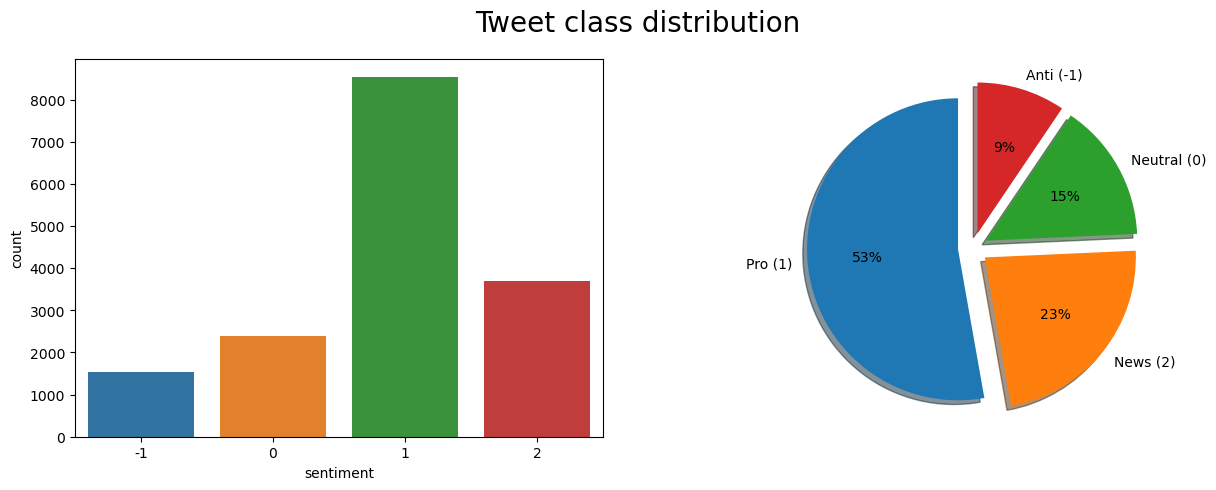

 1    8530
 2    3703
 0    2397
-1    1528
Name: sentiment, dtype: int64


In [175]:
# Display target distribution
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(15, 5), 
                         dpi=100)

sns.countplot(train['sentiment'], ax=axes[0])

labels=['Pro (1)', 'News (2)', 'Neutral (0)', 'Anti (-1)'] 

axes[1].pie(train['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Tweet class distribution', fontsize=20)
plt.show()
print(train['sentiment'].value_counts())

<a id="24"></a>
### **Emoji extraction**
<br>

Emoji's provide valuable insight into the deeper meaning of tweets/text that classification algorithms (even more advanced Neural Networks) inherrently struggle to handle. Understanding contradictory sentiments like sarcasm and dark humour is a major challenge in predictive modelling, yet emoji's provide possible clarity by giving the algorithms specific cases (emojis or combinations of emojis) to train on and associate with underlying emotions (or more simply underlying emotion categories like happy, sad, angry, sarcastic, etc). There are thousands of emojis that can be classed into a few main categories like mentioned in above, yet if the training set is sufficiently large (enough examples of emoji use) the emojic can simply be added as a categorical variable(s). After signficant testing we concluded that extracting emojis in this context (comparatively small training set with only ~15k entries) reduced model performance by creating noise. As is the case with other techniques in NLP, the methods (however promising) requires sufficiently large datasetsl which we do not have in this specific challenge.
<br>
<br>

- **The first approach** uses a function called extract_emoji from the *advertools* package to extract all emojis and identify their associated states (emotions). In this case the extraction results in a DataFrame with 12 columns mostly containing 'None' Values (not all tweets have emojis or the same ammount of emojis - 12 being the maximum that any tweet in our 'train' set contained).
- The **second approach** simply find uses regular expressions to find the most common emojis associated with their emotions (see 'Table 3' below). These can then either be used by 'Type' or further reduced to EMO_POS or EMO_NEG as seen in 'Replacement' in 'Table 3'.

<img src='https://github.com/JacCars/Classification/blob/master/Emoji_table.png?raw=true'>  

In [186]:
# 1st approach

train['emojis'] = advertools.extract_emoji(train['message'])['emoji']
test['emojis'] = advertools.extract_emoji(test['message'])['emoji']


# Dataframe of all emojis used and their number of occurances:
emoji_dict = Counter([val for sublist in train['emojis'] for val in sublist])
emoji_DF = pd.DataFrame(sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True), columns=['Emoji', 'Num_occurances'])
print(f"There are a total of {emoji_DF['Num_occurances'].sum()} emojis used in {train.shape[0]} tweets")

# Replace empty brackets in 'emojis' column with NaN (null-values)
train['emojis'] = [val if len(val)!=0 else np.nan for val in train['emojis']]
test['emojis'] = [val if len(val)!=0 else np.nan for val in test['emojis']]

# DataFrame showing emoji's present in 'train' set (in descending order by number of occurances)
emoji_DF.head(15)

There are a total of 293 emojis used in 16158 tweets


,Emoji,Num_occurances
0,😂,28
1,™,13
2,🤔,13
3,🙄,11
4,🔥,10
5,🤣,8
6,❄️,7
7,🌍,7
8,❤️,7
9,🇺🇸,6


In [ ]:
# This code only serves as an example of another extraction methods and wasn't used due to
# it's erreneous extraction of url-link segments and the discovery of the advertools package with build in emoji handling.
'''
# 2nd approact (can also match to letters in weblinks - misleading)

pattern = {'Smile': r'(:\s?\)|:-\)|\(\s?:|\(-:|:\’\))',
          'Laugh': r'(:\s?D|:-D|x-?D|X-?D)',
           'Wink': r'(:\s?\(|:-\(|\)\s?:|\)-:)',
           'Love': r'(<3|:\*)',
           'Sad': r'(:\s?\(|:-\(|\)\s?:|\)-:)',
           'Cry': r'(:,\(|:\’\(|:"\()'}

# Train set emoji extraction (change name of pattern to match emotion type)
train['emojis'] = train['message'].str.findall(pattern['Laugh'])

# Test set emoji extraction (change name of pattern to match emotion type)
test['emojis'] = test['message'].str.findall(pattern['Smile'])
train
'''

**After all the above extraction and transformations** this is what our two datasets look like:
<br>

In [187]:
train.head(5)

,sentiment,message,tweetid,hashtags,mention,Named_entities,language,message_tokens,POS_tags,lemmas,emojis
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[EPA],English,"[PolySciMajor, EPA, chief, does, n't, think, c...","[(PolySciMajor, n), (EPA, n), (chief, n), (doe...",PolySciMajor EPA chief do n't think carbon dio...,NaN
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,[],English,"[It, 's, not, like, we, lack, evidence, of, an...","[(It, n), ('s, v), (not, r), (like, n), (we, n...",It 's not like we lack evidence of anthropogen...,NaN
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#],NaN,"[TodayinMaker, WIRED, 2016, a pivotal year]",English,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...","[(#, n), (TodayinMaker, n), (#, n), (WIRED, n)...",# TodayinMaker # WIRED : 2016 be a pivotal yea...,NaN
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight],[@soynoviodetodas:],"[RT, 2016, ElectionNight]",English,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...","[(RT, n), (@, n), (SoyNovioDeTodas, n), (:, n)...","RT @ SoyNovioDeTodas : It 's 2016 , and a raci...",NaN
5,1,Worth a read whether you do or don't believe i...,425577,NaN,NaN,[],English,"[Worth, a, read, whether, you, do, or, do, n't...","[(Worth, n), (a, n), (read, a), (whether, n), ...",Worth a read whether you do or do n't believe ...,NaN


In [188]:
test.head(5)

,message,tweetid,hashtags,mention,Named_entities,language,message_tokens,POS_tags,lemmas,emojis
0,Europe will now be looking to China to make su...,169760,NaN,NaN,"[Europe, China]",English,"[Europe, will, now, be, looking, to, China, to...","[(Europe, n), (will, n), (now, r), (be, v), (l...",Europe will now be look to China to make sure ...,NaN
1,Combine this with the polling of staffers re c...,35326,NaN,NaN,[],English,"[Combine, this, with, the, polling, of, staffe...","[(Combine, v), (this, n), (with, n), (the, n),...",Combine this with the polling of staffer re cl...,NaN
2,"The scary, unimpeachable evidence that climate...",224985,"[#itstimetochange, #climatechange]",[@zeroco2_;..],"[#, #]",English,"[The, scary, ,, unimpeachable, evidence, that,...","[(The, n), (scary, a), (,, n), (unimpeachable,...","The scary , unimpeachable evidence that climat...",NaN
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,NaN,"[@karoli, @morgfair, @osborneink, @dailykos]","[Putin, Jill]",English,"[@, Karoli, @, morgfair, @, OsborneInk, @, dai...","[(@, a), (Karoli, n), (@, n), (morgfair, n), (...",@ Karoli @ morgfair @ OsborneInk @ dailykos Pu...,NaN
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,NaN,[@fakewillmoore:],[Republican],English,"[RT, @, FakeWillMoore, :, 'Female, orgasms, ca...","[(RT, n), (@, n), (FakeWillMoore, n), (:, n), ...",RT @ FakeWillMoore : 'Female orgasm cause glob...,NaN


<a id="25"></a>
***
## **Predictive modelling**
***

<a id="26"></a>
### **Base models**
<br>

Although we tested more, for brevity, below are the eight models that we'll discuss in this section. All models, except XGBoost, are from scikit-learn (sklearn) through its locally instantiated python API (meaning their downloaded python package). Bear in mind that each model here represents a family of algorithms of which we simply chose one variation. Sklearn was prioritised for it's extensive documentation, vast userbase (hence thorough troubleshooting guides), access to it's inner workings (not blackbox algorithms - more on this later), and high quality of useability and maintenance.

  * [Naive Bayes (multinomial)](#27)
  * [Logistic Regression Classifier](#28)
  * [Linear Support Vector Classifier (SVC)](#29)
  * [Support Vector Classifier (SVC)](#30)
  * [Decision Tree Classifier](#31)
  * [Random Forest Classifier](#32)
  * [Adaboost Classifier](#33)
  * [eXtreme Gradient Boosting Classifier (XGBoost)](#34)
  * [SMOTE class balancing](#35)
  * [Model Selection and optimisation](#36)

Now that the pre-processing is complete, we split the 'train' set into features (X) and the label (y). 

<br>

**Feature selection** is process by which the features used for modelling are chosen based on their relevance (most often the that capture the most variance in the target variable - meaning the most informative features).

- Many features, like mentions and hashtags, have numerous missing values since not all tweets contain them. This largely disqualifies their use for modelling since most classification algorithms cannot handle missing values and we cannot impute values for text data. We tried XGBoost (see below) which is knows for being capable of handling missing values, yet the algorirm did not perform well - see XGBoost section below for discussion.

<br>

You'll note that not a single one of the features we extracted in pre-processing is actually used in modelling. Ultimately this was due simply to a decrease in accuracy (weighted f1) performance on kaggle. After further research we concluded that our sample size is not large enough for the modelling algorithms to capture true relationships between extracted features (which are, after all, subsets of information) and the sentiment classes. Features such as these can only be leveraged with much larger datasets that contain enough variance in the text for the algorithms to notice and incorporate the true underlying relationships. A key example is Google's word2vec, which outperforms almost all other word vectorisation algorithms by a large margin, and required training on at least 10 million words. To read more on Google's word2vec see https://en.wikipedia.org/wiki/Word2vec and https://code.google.com/archive/p/word2vec/.

In [148]:
# Set the X and y variables to contain the feature ('message' column) and label ('sentiment' column), respectively.
X = train['message']
y = train['sentiment']

Finally, before modelling, the features and label is split into train and test sets with sklearn's train_test_split() method. It is important to note that X_train, X_test, y_train, and y_test are all from the original 'train' dataset and do not come from the original 'test' set. The 'test' set remains intact and will solely be used to create predictions that we will submit for the kaggle competition.
<be>

- Although the predictions that we submit to kaggle are made on X and y (the full train set), here we split the 'train' set so that we can train our models on 75% of the 'train' set and evaluate their performance on the other *unseen* set (25% of the 'train' set).

In [149]:
# Split X into a train and validation (test) set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

<a id="27"></a>
### **Naive Bayes (multinomial)**
<br>

In computer science, Naive Bayes is a group of probabilistic algorithms that use Bayes' theorem to predict the category/class label of various types of data, especially text data. It work by calculating the probability of each label given the text. The equation reads: 'The probability of A given B is equal to the probability of B given A times the probability of A, all divided by the probability of B', or in simpler terms: What is the probability of A when the probability of B is knows. In our case this means: What is the probability of the tweet belonging to each sentiment category given the known sentiment class of similar tweets. The tweet is then assigned to the sentiment class for which is has the highest probability. 
- The term 'naive' comes from the assumption that the algorithm makes that all the input fetures are completely independent of one another (no correlation between them).
- 'Multinomial' refers to the underlying distribution that is assumed for the features (the statistical distribution that explains the variance in the data).
- See the documentation for this algorithm here: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

<br>

<img src='https://github.com/JacCars/Classification/blob/master/Bayes_theorem.png?raw=true'> 


In [150]:
NB = Pipeline([('NB_tfidf', TfidfVectorizer(ngram_range=(1,3), min_df=2)),
               ('NB_clf', MultinomialNB())])

NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred_NB))
NB_metrics = classification_report(y_test, y_pred_NB, output_dict=True)

                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.11      1.00      0.19      0.33      0.10       401
          0       0.92      0.10      1.00      0.18      0.32      0.09       593
          1       0.61      0.98      0.30      0.75      0.54      0.31      2115
          2       0.91      0.49      0.99      0.64      0.70      0.46       931

avg / total       0.76      0.65      0.63      0.59      0.52      0.29      4040



<a id="28"></a>
### **Logistic Regression Classifier**
<br>

Logistic regression is a special case of linear regression whereby the data is fitted to a logit function and labelled as the class for which it has the highest probability of belonging to.

- See the documentation for sklearn's LR here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<br>

Visual description of Logistic Regression:
<img src='https://github.com/JacCars/Classification/blob/master/Log_reg.jpg?raw=true'>
<br>
<br>

Logarithm of odds (logit) function:

<img src='https://github.com/JacCars/Classification/blob/master/logit_func.png?raw=true'>






In [152]:
LR = Pipeline([('LR_tfidf',TfidfVectorizer(min_df=2, smooth_idf=False, ngram_range=(1, 3))),
               ('LR_clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000,
                                         random_state=42))])

LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred_LR))
LR_metrics = classification_report(y_test, y_pred_LR, output_dict=True)

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.68      0.63      0.97      0.65      0.78      0.59       401
          0       0.50      0.57      0.90      0.53      0.72      0.50       593
          1       0.83      0.72      0.84      0.77      0.78      0.60      2115
          2       0.69      0.85      0.88      0.76      0.87      0.75       931

avg / total       0.73      0.72      0.87      0.72      0.79      0.62      4040



<a id="29"></a>
### **Linear Support Vector Classifier (SVC)**

The Linear SVC is very similar to Logistic Regression (LR). If differers mostly in applying a buffer margin (determined by the support vectors - vectors that lie on the buffer margins) and using 'hinge loss' as apposed to log loss by LR. The Linear SVC creates a separating hyperplane that optimally separates the different classes ('hinge loss' is the function that determines the buffer zone and hence the separation). In simpler terms, the Linear SVC allows for a margin of error when determining how to optimally separate the different classes, making it more robust to data with classes that aren't very clearly separated.

- In the case of multiple target classes (like this one), the Linear SVC separates the classes on a one-vs-rest manner.
- See the documentation for sklearn's Linear SVC here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

<br>

<br>

Visual representation of a Linear SVC hyperplane separating two different classes with buffer zone (strict margin):
<img src='https://github.com/JacCars/Classification/blob/master/SVC.png?raw=true'>


In [217]:
LSVC = Pipeline([('LSVC_tfidf', TfidfVectorizer(min_df=2, smooth_idf=False, ngram_range=(1, 3))),
                 ('LSVC_clf', LinearSVC(random_state=42))])

LSVC.fit(X_train, y_train)
y_pred_LSVC = LSVC.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred_LSVC))
LSVC_metrics = classification_report_imbalanced(y_test, y_pred_LSVC)

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.85      0.55      0.99      0.67      0.74      0.52       401
          0       0.61      0.47      0.95      0.53      0.67      0.42       593
          1       0.77      0.87      0.71      0.82      0.79      0.63      2115
          2       0.79      0.78      0.94      0.78      0.85      0.72       931

avg / total       0.76      0.76      0.82      0.75      0.78      0.61      4040



<a id="30"></a>
### **Support Vector Classifier (SVC)**
<br>

The Support Vector Classifier (SVC) differs form the Linear LSC mostly in that the SVC has other, non-linear, 'kernals'. Kernals refer to way in which the data is separated into classes. See the pic below for other types of 'kernals'.
- See sklearn's documentation for the SVC here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

<img src='https://github.com/JacCars/Classification/blob/master/SVC_kernals.png?raw=true'>

In [ ]:
SVC = Pipeline([('SVC_tfidf', TfidfVectorizer(min_df=2, smooth_idf=False, ngram_range=(1, 3)))),
                ('SVC_clf', SVC(random_state=42))])

SVC.fit(X_train, y_train)
y_pred_SVC = SVC.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred_SVC))
SVC_metrics = classification_report(y_test, y_pred_SVC, output_dict=True)

              precision    recall  f1-score   support

          -1       0.86      0.23      0.36       339
           0       0.78      0.26      0.39       585
           1       0.70      0.91      0.79      2088
           2       0.77      0.78      0.78       943

    accuracy                           0.73      3955
   macro avg       0.78      0.55      0.58      3955
weighted avg       0.74      0.73      0.69      3955



<a id="31"></a>
### **Decision Tree Classifier**
<br>

A decision tree classifier builds a model from the top down in a tree structure, where each decision point is called a 'Decision Node' and the end point calles 'Leaf Nodes'. The data is broken down into smaller and smaller subsets while a associated decision tree is progressively built to capture the decisions that determine the paths of the tree. See the below picture for a standard example of a decision tree.

- See sklearn's documentation for it's decision tree implementation here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<br>
<br>

Visual representation of a decision tree:

<img src='https://github.com/JacCars/Classification/blob/master/Decision_treeC.jpeg?raw=true'>

<br>

Simple example of a decision tree:

<img src='https://github.com/JacCars/Classification/blob/master/DT_example.png?raw=true'>

In [218]:
DT = Pipeline([('DT_tfidf', TfidfVectorizer(min_df=2, smooth_idf=False, ngram_range=(1, 3))),
               ('DT_clf', DecisionTreeClassifier(max_depth=5, random_state=42))])

DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred_DT))
DT_metrics = classification_report(y_test, y_pred_DT, output_dict=True)

              precision    recall  f1-score   support

          -1       0.65      0.06      0.11       401
           0       0.58      0.23      0.33       593
           1       0.57      0.94      0.71      2115
           2       0.72      0.22      0.33       931

    accuracy                           0.58      4040
   macro avg       0.63      0.36      0.37      4040
weighted avg       0.61      0.58      0.51      4040



<a id="32"></a>
### **Random Forest Classifier**
<br>

The Random Forest Classifier can be simply described as a collection of numerous Decision Trees that 'vote' by majority to determine the final class prediction. The number of trees can be varied.
<br>

- See sklearn's documentation for its Random Forest Classifier here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Random Forest Classifiers are considere to be 'black-box models', meaning that one cannot ascertain from the trained model how it made certain decesions as hundren or even thousands (or more) trees could have voted for a certain prediction in different conbinations.Of all the models we tried here, only the  Random Forest, Adaboost, and XGBoost are considered 'black-box models'.

Visual representation of a random forest containing three decision trees:

<img src='https://github.com/JacCars/Classification/blob/master/RF_pic.png?raw=true'>

In [ ]:
RF = Pipeline([('RF_tfidf', TfidfVectorizer(min_df=2, smooth_idf=False, ngram_range=(1, 3))),
               ('RF_clf', RandomForestClassifier(max_depth=10, 
                                              n_estimators=100,
                                              random_state=42))])

RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred_RF))
RF_metrics = classification_report(y_test, y_pred_RF, output_dict=True)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       339
           0       1.00      0.01      0.03       585
           1       0.53      1.00      0.69      2088
           2       1.00      0.02      0.03       943

    accuracy                           0.53      3955
   macro avg       0.63      0.26      0.19      3955
weighted avg       0.67      0.53      0.38      3955



/home/jcar/anaconda3/envs/anaconda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id="33"></a>
### **AdaBoost Classifier**
<br>

Adaboost by sklearn is a meta-classifier. Meaning that it is not a classifier *per se* but rather that it takes as input a classifier and performs additional optimisation processes using that input classifier. In this case our input classifier is a Linear SVC (as it is the model with the best performance). Adaboost performs 'boosting' whereby it build a single classifier (Linear SVC in this case), asseses it's accuracy, then rebuilds the classifier focussing more on the classes that were incorrectly predicted in the previous iteration. This approach is especially usefull in datasets with highly imbalanced class distributions (such as in the current task).

- See sklearn's documentation for Adaboost here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- **Note**: Adaboost performed worse that its base classifier (Linear SVC). This supports our conclusion that the resulting model benefits from prediction bias introduced by the class imbalance since compensating for the class imbalance (Adaboost) decreased predictive accuracy.
<br>

Visual representation of of the Adaboost algorithm building 'weak learners' (classifiers) initially, then building 'strong learners' after focussing on minority classes:

<img src='https://github.com/JacCars/Classification/blob/master/Adaboost_pic.jpg?raw=true'>

In [222]:
AC = Pipeline([('AC_tfidf', TfidfVectorizer(min_df=2, smooth_idf=False, ngram_range=(1, 3))),
              ('AC_clf', AdaBoostClassifier(LinearSVC(), algorithm='SAMME', n_estimators=200, random_state=42))])

AC.fit(X_train, y_train)
y_pred_AC = AC.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred_AC))
RF_metrics = classification_report(y_test, y_pred_AC, output_dict=True)

'                   pre       rec       spe        f1       geo       iba       sup\n\n         -1       0.71      0.39      0.98      0.50      0.62      0.36       401\n          0       0.57      0.35      0.95      0.44      0.58      0.32       593\n          1       0.70      0.88      0.58      0.78      0.71      0.53      2115\n          2       0.74      0.63      0.93      0.68      0.77      0.57       931\n\navg / total       0.69      0.69      0.76      0.68      0.70      0.49      4040\n'

<a id="34"></a>
### **eXtreme Gradient Boosting Classifier (XGBoost)**
<br>

XGBoost is a package that implements gradient boosting with a random forest algorithm. Similar to Adaboost, it reproduces the original model, focussing on in improving classes and/or cases where it made incorrect prediction. Unlike Adaboost it used Random Forests instead of another model that the user chooses.

- Initially we though that XGBoost is promising (due to it's reputation and history of strong performance in text classification). Unfortunately that proved to not be the case here, presumably due to the small sample size of our train set.
- Similar to Adaboost, XGBoost did not perform very well, presumably due to corrections in prediction bias that actually help the model to coincidentally assign tweets to the correct class.
- See XGBoost's documentation here: https://xgboost.readthedocs.io/en/latest/

A graphical representation of the XGBoost classification algorithm:

<img src='https://github.com/JacCars/Classification/blob/master/XGBoost_pic.png?raw=true'>

<br>
<br>

**For performance evaluation and hyperparameter opmisisation** we used K-fold Cross-Validation (see pic below) which splits the train set into k-folds (5 in our case) where a different fold is used for validation after each round. Meaning that the above grid-search is performed 5 times, with a different holdout fold each time. 'Stratefied' means that each fold still represents the original class distribution of the dataset.

Visual representation of Strattefied Cross-Validation:

<img src='https://github.com/JacCars/Classification/blob/master/StratefiedCV.png?raw=true'>

In [ ]:
XGBoost = Pipeline([('tfidf', TfidfVectorizer(min_df=2, smooth_idf=False, ngram_range=(1, 3)))), 
                    ('svd', TruncatedSVD(n_components=300, algorithm='randomized')),
                    ('clf', XGBClassifier(objective='multi:softmax'))])

In [231]:
param_grid = {
        'clf__max_depth': [1,3,5,10,15],
        'clf__learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'clf__subsample': [0.5, 0.6, 0.8, 1.0],
        'clf__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'clf__colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'clf__min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0],
        'clf__gamma': [0, 0.25, 0.5, 1.0],
        'clf__reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'clf__n_estimators': [100]}

# We use stratefied K fold cross validation to ensure that each fold represents the class distribution of the train set.
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

searchCV = RandomizedSearchCV(XGBoost, cv=skf, param_distributions=param_grid, n_iter=10, verbose=3, scoring='f1_weighted')
# Since we are doing cross validation here we can use the entire train set.
searchCV.fit(X, y)

In [ ]:
#print(searchCV.best_params_)
#print(searchCV.best_score_)
#searchCV.scoring
#XGB_tuned_params = searchCV.best_params_

In [ ]:
#XGBoost.set_params(**searchCV.best_params_)
#XGBoost.fit(X_train, y_train)

In [ ]:
#y_pred = XGBoost.predict(X_test)

In [ ]:
#XGBoost_metrics = classification_report(y_test, y_pred_DT, output_dict=True)
#print(classification_report(y_test, y_pred))

<a id="35"></a>
### **SMOTE class rebalancing**
<br>

SMOTE, or 'Synthetic Minority Oversampling TEchnique' is a more advanced class balancing method that creates additional data in each class similar to the original data from that class, synthetically adding data to balance the class distribution while retaining integrity of each class. It differs from the upsampling technique used earlier in the notebook in that it doesn't duplicate entries to increase class size but create new entries (data points) with similar properties.

- We tested various variations of SMOTE though none lead to better accuracy results than our own upsampling technique in Pre-procesing.
- The accuracy results below look very similar to that of LinearSVC with custom balancing yet upon submission to kaggle the LinearSVC with custom balancing outperformed SMOTE.

<br>

Visual representation of SMOTE:

<img src='https://github.com/JacCars/Classification/blob/master/SMOTE.png?raw=true'>


In [228]:
# Create a pipeline
pipeline = make_pipeline(TfidfVectorizer(min_df=2, smooth_idf=False, ngram_range=(1, 3)),
                         # One can vary the dictionary in the line below to controll the number of samples for each class after balancing
                         BorderlineSMOTE(k_neighbors=140, sampling_strategy={-1:1495, 0:2715, 1:8530, 2:3640}),
                         LinearSVC(random_state=42))

pipeline.fit(X_train, y_train)
y_pred_SMOTE = pipeline.predict(test['message'])

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.84      0.56      0.99      0.68      0.75      0.53       401
          0       0.57      0.48      0.94      0.52      0.67      0.43       593
          1       0.77      0.86      0.71      0.81      0.78      0.62      2115
          2       0.79      0.77      0.94      0.78      0.85      0.72       931

avg / total       0.75      0.76      0.83      0.75      0.78      0.61      4040



<a id="36"></a>
### **Model selection and optimisation**
<br>


- We use 'classification_report_imbalanced' from the *imblearn* package to generate model performance metrics since we are working with imbalanced class distributions.
- From the classification report generated below each model it is clear that **the Linear SVC with custom balancing performed the best** (by f1-score accuracy).
- Below we tried to improve the performance of the this Linear SVC model, yet ultimately we found that using the hyperparameters from the gridsearch below actually decreased the accuracy on kaggle. 
- At first wide ranging values are used (e.g. C: [ 0.001, 0.1, 1, 10, 100, 1000]) after which narrower margins were used (e.g. C:[0.90, 0.99, 1, 1.01, 1.03]

<br>

Below we will aim to improve the performance of the Linear SVC model through hyperparameter tuning using gridsearch (with stratefied cross validation).

Stratified sampling means that the class membership distribution is preserved in your KFold sampling

In [232]:
LSVC_param_grid = {'LSVC_clf__C': [1, 1.01, 1.02, 1.03],
                   'LSVC_tfidf__max_df': (0.9, 0.999),
                   'LSVC_tfidf__min_df': (0,0.00001, 0.001),
                   'LSVC_tfidf__ngram_range': [(1, 2), (1, 3), (1, 4), (1, 5)]}


# Using the Linear SVC model above, we perform the gridsearch
LSVC_searchCV = GridSearchCV(LSVC, cv=skf, param_grid=LSVC_param_grid, verbose=3, scoring='f1_weighted', n_jobs=-1, refit=True)
LSVC_searchCV.fit(X, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.4min finished


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       401
           0       1.00      1.00      1.00       593
           1       1.00      1.00      1.00      2115
           2       1.00      1.00      1.00       931

    accuracy                           1.00      4040
   macro avg       1.00      1.00      1.00      4040
weighted avg       1.00      1.00      1.00      4040



In [ ]:
# These are the best parameters resulting from the above gridsearch.
LSVC_searchCV.best_params_

{'LSVC_clf__C': 1.02,
 'LSVC_tfidf__max_df': 0.9,
 'LSVC_tfidf__min_df': 0,
 'LSVC_tfidf__ngram_range': (1, 2)}

<a id="37"></a>
***
## **Preparing submission**
***
<br>

Finally, we train the original Linear SVC model (LSVC) -as it is our best performing model- on the entire 'train' set and submit the predictions to kaggle

In [ ]:
# Refit LSVC to the entire train set
LSVC.fit(X, y)

In [ ]:
Sub_df = pd.DataFrame(test['tweetid'])
Sub_df['sentiment'] = LSVC.predict(test['message'])
Sub_df.to_csv('Team_5_Classification_predictions', index=False)

<a id="38"></a>
***
## **Comet logs for each model**
***

In [ ]:
#Naive Bayes
NB_params = {'clf':'MultinomialNB',
             'vectorizer':'TfidfVectorizer'}
#NB_metric = NB_metrics

In [ ]:
#Logistic Regression Classifier
LR_Params = {'clf':'LogisticRegression',
             'vectorizer':'TfidfVectorizer',
             'C':1, 
             'class_weight':'balanced', 
             'max_iter':1000
            } 
#LR_metrics = LR_metrics

In [ ]:
#Linear SVC
LSVC_params={'clf':'LinearSVC',
             'vectorizer':'TfidfVectorizer',
             'class_weight':'balanced'
             }
LSVC_metric = LSVC_metrics 

In [ ]:
#Random Forest Classifier
RF_params={'clf':'RandomForestClassifier',
           'vectorizer':'TfidfVectorizer',
           'max_depth':10, 
           'n_estimators':100
           }
#RF_metric= RF_metrics

In [ ]:
#Decision Tree Classifier Comet Log
DTC_params = {'clf':'DecisionTreeClas',
              'vectorizer':'TfidfVectorizer',
              max_
         }
#DTC_metric=DTC_metrics

In [ ]:
#XGBoost Comet Log
XGB_pipeline_arguments = {'clf':'XGBoost',
                          'vectorizer':'TfidfVectorizer',
                          'svd':'TruncatedSVD(n_components=300)',
                          'random_state':'42',
                          'clf__subsample': 0.5,
                          'clf__reg_lambda': 50.0,
                          'clf__n_estimators': 100,
                          'clf__min_child_weight': 7.0,
                          'clf__max_depth': 10,
                          'clf__learning_rate': 0.2,
                          'clf__gamma': 0,
                          'clf__colsample_bytree': 0.4,
                          'clf__colsample_bylevel': 0.9}


XGB_metric = XGB_metric

In [ ]:
#log Expirement 
experiment.log_params(NB_params)
experiment.log_metrics(NB_metric)

In [ ]:
experiment.end()

<a id="39"></a>
***
## **Conclusion**
***

<a id="40"></a>
***
## **Contributions and acknowledgements**
***

<a id="40"></a>
<center>THE END</center>


**Team members and contributions**
<br>

Kgauhelo Mokgawa: Decision Tree Classifier, Comet experiments and documentation, Helped with streamlit app, helped with EDA.
<br>
Jacques Carstens: EDA, Models except Decision Tree, code explanations, helped with streamlit.
<br>
Sandile:
<br>
Thamsanqa: 